Let’s actually implement Linear Regression assumptions step by step on a real dataset.
We’ll use the Diabetes dataset from sklearn (continuous target, good for regression).

🟢 Step 1: Import Libraries & Dataset

We’ll use the built-in Diabetes dataset from sklearn (a regression dataset).

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [33]:
# Load dataset
data = load_diabetes()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="target")

# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train linear regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Residuals (Errors)
residuals = y_test - y_pred


🟢 Step 2: Check Assumptions
1. Linearity

👉 The relationship between features and target should be linear.


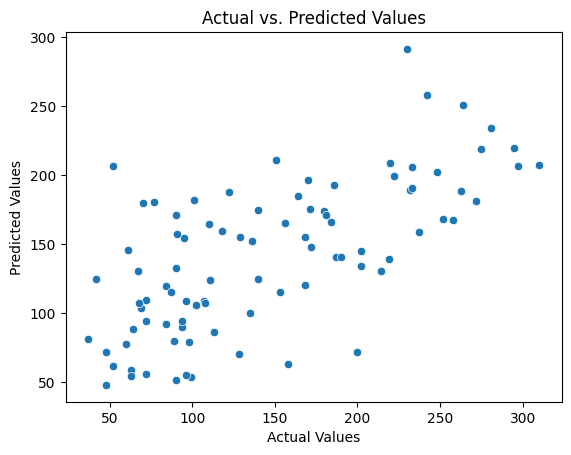

In [35]:
sns.scatterplot(x=y_test,y=y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

✅ If points roughly form a diagonal line → good.

2. No Multicollinearity

👉 Features should not be too strongly correlated.

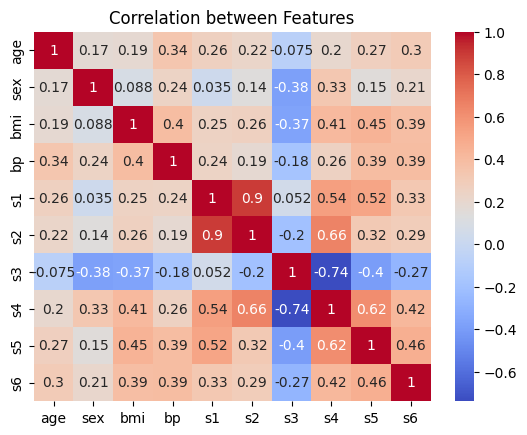

In [37]:
sns.heatmap(X.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation between Features")
plt.show()


✅ If you see very high correlations (close to 1.0), multicollinearity might be a problem.

3. Normality of Residuals

👉 Errors should follow a normal distribution.

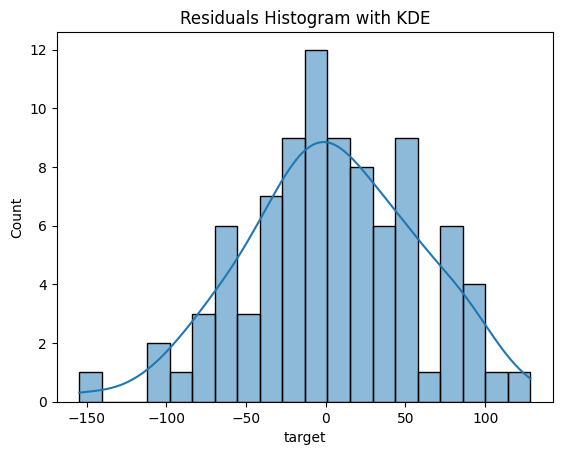

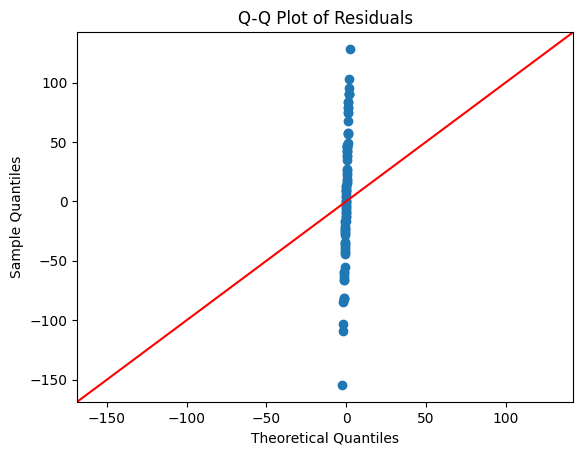

In [41]:
sns.histplot(residuals, bins=20, kde=True)
plt.title("Residuals Histogram with KDE")
plt.show()

sm.qqplot(residuals, line='45')
plt.title("Q-Q Plot of Residuals")
plt.show()

✅ Histogram should look like a bell curve.

4. Homoscedasticity (Equal variance of errors)

👉 Residuals should have constant spread.

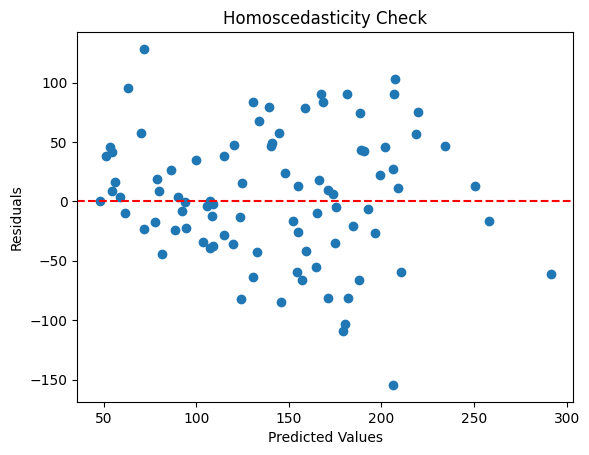

In [42]:
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Homoscedasticity Check")
plt.show()


✅ Points should be randomly scattered around the red line

5. Independence of Errors

👉 Errors should not be related to each other

In [43]:
from statsmodels.stats.stattools import durbin_watson

print("Durbin-Watson Statistic:", durbin_watson(residuals))


Durbin-Watson Statistic: 2.242779276467736


✅ If the value is close to 2, errors are independent.

🔎 How to interpret it

DW = 2 → no autocorrelation (ideal ✅)

DW < 2 → positive correlation of errors

DW > 2 → negative correlation of errors

👉 Since your result is 2.24, that’s very close to 2 → means your residuals are independent (assumption satisfied ✅).